### Auto Encoder
- 비지도학습 딥러닝 모델
- 입력값을 압축시킨 후 다시 압축된 정보를 복원해서 입력값과 동일출력값으로 학습되는 모델
- 학습 과정을 통해 최대한 입력값과 출력값이 일치되도록 모델 파라미터가 최적화됨.
- 오토 인코더의 압축된 정보는 입력값에서 노이즈가 제거된 핵심 특징들로 구성된 저차원 데이터로 간주되어 주로 차원축소의 목적으로 활용됨.

In [1]:
from IPython.display import Image
Image(url= "https://raw.githubusercontent.com/captainchargers/deeplearning/master/img/autoencoder1.png", width=500, height=100)

In [2]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# data 정규화
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = x_train.reshape((len(x_train),28*28))
x_test = x_test.reshape((len(x_test),28*28))

## Tensorflow Model 만들기

In [6]:
# MNIST Data를 입력으로
InputModel = keras.layers.Input(shape=(28*28))

In [16]:
InputModel.shape

TensorShape([None, 784])

In [7]:
# EncoderLayer는 3차원으로 축소된 입력값
EncodedLayer = keras.layers.Dense(32,activation='relu')(InputModel)

In [8]:
# DecoderLayer는 MNIST차원으로 복원된 값
DecoderLayer = keras.layers.Dense(28*28, activation='sigmoid')(EncodedLayer)

In [9]:
# AuroEncoderModel은 입력값과 복원값을 최소화하는 과정
AutoEncoderModel = keras.models.Model(InputModel,DecoderLayer)

In [10]:
AutoEncoderModel.compile(optimizer='adam',loss='binary_crossentropy')

In [11]:
history = AutoEncoderModel.fit(x_train,x_train,batch_size=256,epochs=50,shuffle=True,validation_data=(x_test,x_test))

Epoch 1/50


2023-03-09 13:31:06.063362: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


235/235 [==============================] - 1s 3ms/step - loss: 0.2744 - val_loss: 0.1880
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1699 - val_loss: 0.1532
Epoch 3/50
235/235 [==============================] - 1s 4ms/step - loss: 0.1444 - val_loss: 0.1343
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1286 - val_loss: 0.1214
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1180 - val_loss: 0.1129
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1110 - val_loss: 0.1070
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1060 - val_loss: 0.1028
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1024 - val_loss: 0.0996
Epoch 9/50
235/235 [==============================] - 1s 4ms/step - loss: 0.0996 - val_loss: 0.0971
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0976 - val_loss: 0.0955
Epoch 11/5

In [12]:
DecodedDigits = AutoEncoderModel.predict(x_test)

313/313 [==============================] - 0s 311us/step


In [13]:
# x_test와 DecodedDigits의 크기
print(x_test.shape)
print(DecodedDigits.shape)

(10000, 784)
(10000, 784)


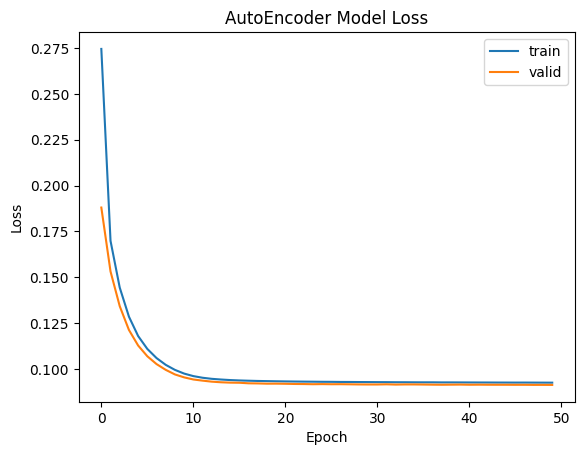

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('AutoEncoder Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','valid'])
plt.show()

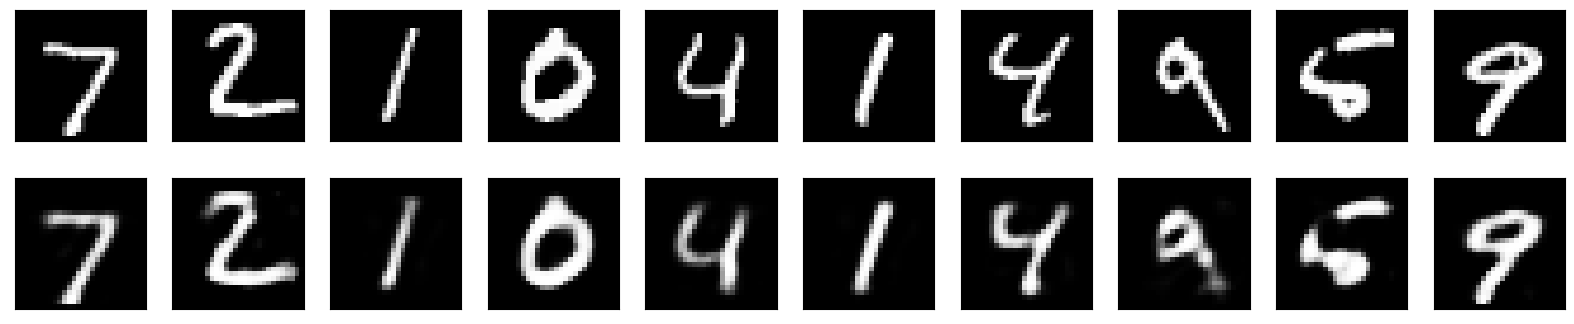

In [15]:
# 10개의 이미지를 시각화
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
# ------------------------------
    ax= plt.subplot(2,n,i+1+n)
    plt.imshow(DecodedDigits[i].reshape(28,28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.gray()
plt.show()